In [198]:
import pandas as pd
import re
import csv

pd.set_option('display.max_colwidth', None)


def load(filename):
    df = pd.read_csv(filename, sep='\t', encoding='utf-8', names=['tweet_id', 'tweet_url', 'tweet_text', 'class_label'], quoting=csv.QUOTE_NONE, skiprows=1)
    df.drop(columns=['tweet_url'], inplace=True)
    return df


train_df = load('CT24_checkworthy_spanish_train.tsv')
dev_df = load('CT24_checkworthy_spanish_dev.tsv')
dev_test_df =  load('CT24_checkworthy_spanish_dev-test.tsv')

## Data exploration
* Dataframe size
* Class distributation
* Text Length Analysis
* Word Frequency Analysis
* Check for emojies and special chars
* Find and print filler words
* Find and save hashtags and mentions
* Find dublicates


Dataset Size:
(3198, 3)

Class Distribution:
class_label
No     1976
Yes    1222
Name: count, dtype: int64
Text Length Statistics:
 count    3198.000000
mean       36.626954
std        10.817766
min         2.000000
25%        30.000000
50%        40.000000
75%        45.000000
max        58.000000
Name: text_length, dtype: float64


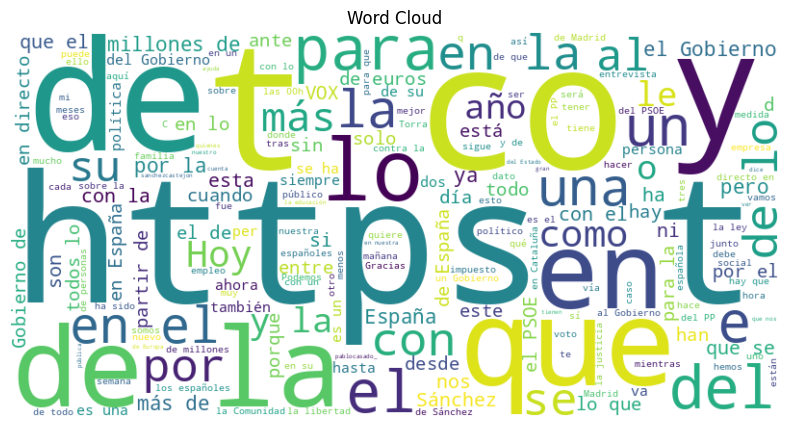

Tweets Containing Filler Words:
Tweet ID: 1218137295188123648
Tweet Text: Pedro Sánchez ha dado el visto bueno a la apertura de las 'embajadas' catalanas en Argentina, México y Túnez.  Empiezan las cesiones a sus socios separatistas.  Incrementan gasto en sus majaderías, despreciando la urgencia de las política sociales.   https://t.co/kI9uUtSxfb
Filler Words: bueno

Tweet ID: 1101098306854445058
Tweet Text: El 54,7% cree que hubiera sido bueno aprobar los #PGE19. El 46,4 de los votantes de Cs en 2016 creen que hubiera sido bueno aprobarlos. #CIS https://t.co/93dQrCsbDi
Filler Words: bueno, bueno

Tweet ID: 1186547505108049920
Tweet Text: EH Bildu  -&gt;  14’8   (+0’1) ? P. Popular -&gt;14’7  Cada papeleta ? de EH Bildu en Araba el próximo #10N estará llena de responsabilidad y orgullo. Orgullo por ser los y las alavesas quienes dejemos sin representantes aquí a la derecha española reaccionaria. ?? #GoazenIñaki https://t.co/Y1GZPdDXAy
Filler Words: eh, eh

Tweet ID: 1180590999497662464

,tweet_id,tweet_text,class_label,text_length,hashtags,mentions
0,1192517071348699136,"📅 Mañana, viernes, no puedes perderte el gran acto de cierre de campaña en Madrid. ⏰ A las 19.00 h en el Pabellón 1 de IFEMA (Madrid). Con Kiko Veneno y O'Funk'illo en concierto y la intervención de @Pablo_Iglesias_, @AdaColau, @Irene_Montero_, @agarzon... ¡Te esperamos! https://t.co/IxHyDWdB0S",No,45,[],"[@Pablo_Iglesias_,, @AdaColau,, @Irene_Montero_,, @agarzon...]"
1,1220987059701190656,"🔴 DIRECTO | Reyes Maroto: ""Si nos centramos en las sinergias la legislatura, al menos en la parte del gobierno, va a funcionar muy bien. Además, los ministros y ministras nos llevamos muy bien"" https://t.co/K3k4v7vslz",No,35,[],[]
2,1226786513226280961,"@JonInarritu @EHBilduCongreso 🔴🎙️ @JonInarritu, diputado @EHBilduCongreso: ""Que los partidos catalanes nacionalistas encuentren un Mínimo Común Denominador es difícil. Sobre todo, si se intentan sembrar la discordia y si la represión provoca un adelanto electoral.""",No,34,[],"[@JonInarritu, @EHBilduCongreso, @JonInarritu,, @EHBilduCongreso:]"
3,1217566329823252481,@tve_tve vuelve a quedar en evidencia. Desplaza al minuto 18 la denuncia del #CGPJ ante las críticas de Iglesias y habla de “diferencias”. Exigimos al responsable de edición del telediario explicaciones y a Sánchez que deje de utilizar @rtve a su antojo @Enric_Hernandez,Yes,43,[#CGPJ],"[@tve_tve, @rtve, @Enric_Hernandez]"
4,1172059020095610881,"El nuevo curso escolar en #Andalucía comienza con... ?? ✅El mayor presupuesto de su historia ✅750 nuevos profesores, más que nunca ✅3.000 nuevos funcionarios que antes eran interinos Son hechos: la oposición miente cuando dice que estamos desmantelando la educación pública. https://t.co/c8fANaDaRA",Yes,42,[#Andalucía],[]


In [199]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import html

filler_words = ['eh', 'ah', 'oh', 'pues', 'bueno', 'vaya', 'oye', 'mira', 'entonces', 'a ver']
html_replace = {
        '&lt;': '<',
        '&gt;': '>',
        '&amp;': '&',
        '&quot;': '"',
        '&apos;': "'",
        '&#39;': "'",
        '&#34;': '"',
        '&#60;': '<',
        '&#62;': '>',
        '&#38;': '&'
    }

def replace_html_entities(text):
    # Replace common HTML entities
    text = html.unescape(text)
    for entity, char in html_replace.items():
        text = text.replace(entity, char)
    return text

def find_fillers(text):
    words = text.lower().split()
    found_fillers = [word for word in words if word in filler_words]
    return found_fillers


def data_exploration(df):
  print("Dataset Size:")
  print(df.shape)

  print("\nClass Distribution:")
  print(df['class_label'].value_counts())

  # Text length analysis
  df['text_length'] = df['tweet_text'].apply(lambda x: len(x.split()))
  print("Text Length Statistics:\n", df['text_length'].describe())

  # Word Frequency Analysis
  all_words = ' '.join(df['tweet_text'])
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud')
  plt.show()

  tweets_with_fillers = df[df['tweet_text'].apply(find_fillers).apply(len) > 0]

  print("Tweets Containing Filler Words:")
  for index, row in tweets_with_fillers.iterrows():
        filler_words = find_fillers(row['tweet_text'])
        print(f"Tweet ID: {row['tweet_id']}")
        print(f"Tweet Text: {row['tweet_text']}")
        print(f"Filler Words: {', '.join(filler_words)}\n")

  # Hashtag and Mention Analysis
  df['hashtags'] = df['tweet_text'].apply(lambda x: [word for word in x.split() if word.startswith('#')])
  print("Most Common Hashtags:\n", pd.Series([item for sublist in df['hashtags'] for item in sublist]).value_counts().head(10))

  df['mentions'] = df['tweet_text'].apply(lambda x: [word for word in x.split() if word.startswith('@')])
  print("Most Common Mentions:\n", pd.Series([item for sublist in df['mentions'] for item in sublist]).value_counts().head(10))

  # Duplicate Analysis
  duplicate_tweets = df[df.duplicated(subset='tweet_text', keep=False)].sort_values(by='tweet_text')
  print("Duplicate Tweets:\n", duplicate_tweets[['tweet_text', 'class_label']])

  return


data_exploration(train_df)
train_df.head()


In [200]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

def remove_extra_spaces(text):
    # Remove additional white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def replace_text(text):
  text = re.sub(r'’', '" ', text)
  text = re.sub(r'“', '" ', text)
  text = re.sub(r'”', '" ', text)

  # Replace euro symbol with text and format amount
  text = re.sub(r'€(\d+)', r'euro \1', text)
  text = re.sub(r'(\d+)\s*M€', r'\1 millones de euros', text) # Replace M€
  text = re.sub(r'\[.*?\]', '.', text) # Remove [] and its content

  # Handle special characters
  if text.startswith('?| ') or text.startswith('? | '):
      text = text.replace('?| ', '')
      text = text.replace('? | ', '')
  elif ' ? ' in text:
      text = text.replace(' ? ', ' ')
  elif ' | ' in text:
      text = text.replace(' | ', ' ')

  # Replace : with .
  if text.endswith(':'):
        text = text[:-1] + '.'

  return text

def handle_dash(text):
    # Replace "/" between two related pieces of information with "o"
    text = re.sub(r'(\w+)\s*/\s*(\w+)', r'\1 o \2', text)

    # Remove "/" at the end or before a dot
    text = re.sub(r'(/|\./)\s*', '', text)
    return text

def clean_text(text):
  text = re.sub(r'(@\w+\s*)+', '@<USER> ', text)

  text = re.sub(r'[^\x00-\x7Fáéíóúüñ¡¿]+', '', text) # Remove emojis and non-ASCII characters excluding Spanish special characters
  text = re.sub(r'http\S+|www.\S+', '', text).strip()  # Remove urls
  text = re.sub(r'\? @', ' @', text) # Replace "?" before mentions with space
  text = re.sub(r'->|�', ' ', text) # Replace special characters

  return text

def replace_repeated_characters(text):
    # Replace repeated special characters with a single occurrence
    text = re.sub(r'([,!?]){2,}', r'\1', text)
    text = re.sub(r'\.{4,}', '...', text)
    return text

def remove_repetitive_phrases(text):
    # Split text into tokens
    tokens = re.split(r'[ ,]+', text)

    # Remove duplicates while preserving order
    unique_tokens = []
    seen_tokens = set()

    for token in tokens:
        if token not in seen_tokens:
            unique_tokens.append(token)
            seen_tokens.add(token)

    # Join unique tokens back into a string
    cleaned_text = ' '.join(unique_tokens)

    return cleaned_text

def preprocessing(train_df):
  train_df['tweet_text'] = train_df['tweet_text'].apply(replace_html_entities)
  train_df['tweet_text'] = train_df['tweet_text'].apply(replace_repeated_characters)
  train_df['tweet_text'] = train_df['tweet_text'].apply(clean_text)

  train_df['tweet_text'] = train_df['tweet_text'].apply(replace_text)
  train_df['tweet_text'] = train_df['tweet_text'].apply(handle_dash)

  train_df['tweet_text'] = train_df['tweet_text'].apply(remove_repetitive_phrases)

  train_df['tweet_text'] = train_df['tweet_text'].apply(remove_extra_spaces)


  # Categorize text length
  bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
  labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']
  train_df['text_length_category'] = pd.cut(train_df['text_length'], bins=bins, labels=labels)

  # Label encode class label
  label_encoder = LabelEncoder()
  train_df['class_label_encoded'] = label_encoder.fit_transform(train_df['class_label'])


  train_df = train_df.drop(columns=['text_length'])
  return


preprocessing(train_df)
train_df.head()

,tweet_id,tweet_text,class_label,text_length,hashtags,mentions,text_length_category,class_label_encoded
0,1192517071348699136,Mañana viernes no puedes perderte el gran acto de cierre campaña en Madrid. A las 19.00 h Pabellón 1 IFEMA (Madrid). Con Kiko Veneno y O'Funk'illo concierto la intervención @<USER> ... ¡Te esperamos!,No,45,[],"[@Pablo_Iglesias_,, @AdaColau,, @Irene_Montero_,, @agarzon...]",41-50,0
1,1220987059701190656,"DIRECTO Reyes Maroto: ""Si nos centramos en las sinergias la legislatura al menos parte del gobierno va a funcionar muy bien. Además los ministros y ministras llevamos bien""",No,35,[],[],31-40,0
2,1226786513226280961,"@<USER> diputado : ""Que los partidos catalanes nacionalistas encuentren un Mínimo Común Denominador es difícil. Sobre todo si se intentan sembrar la discordia y represión provoca adelanto electoral.""",No,34,[],"[@JonInarritu, @EHBilduCongreso, @JonInarritu,, @EHBilduCongreso:]",31-40,0
3,1217566329823252481,@<USER> vuelve a quedar en evidencia. Desplaza al minuto 18 la denuncia del #CGPJ ante las críticas de Iglesias y habla diferencias. Exigimos responsable edición telediario explicaciones Sánchez que deje utilizar su antojo,Yes,43,[#CGPJ],"[@tve_tve, @rtve, @Enric_Hernandez]",41-50,1
4,1172059020095610881,El nuevo curso escolar en #Andalucía comienza con... mayor presupuesto de su historia 750 nuevos profesores más que nunca 3.000 funcionarios antes eran interinos Son hechos: la oposición miente cuando dice estamos desmantelando educación pública.,Yes,42,[#Andalucía],[],41-50,1


## Feature engineering
  * Add Frequency of Hashtags
  * Sentiment Analysis of Hashtags
  * Topic Modeling with LDA

In [196]:
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Function to count frequency of hashtags
def count_hashtags_frequency(text):
    hashtags = re.findall(r"#(\w+)", text)
    return len(hashtags)

# Function to analyze sentiment of hashtags
def analyze_hashtag_sentiment(text):
    hashtags = re.findall(r"#(\w+)", text)
    if hashtags:
        sentiment_scores = [TextBlob(hashtag).sentiment.polarity for hashtag in hashtags]
        avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)
        return avg_sentiment
    else:
        return 0

# Function for topic modeling with LDA
def topic_modeling_with_lda(texts):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(texts)

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(dtm)

    topics = lda.transform(dtm)

    return topics.argmax(axis=1)

def add_additional_features(train_df):
    # Count frequency of hashtags
    train_df['hashtags_frequency'] = train_df['tweet_text'].apply(lambda x: count_hashtags_frequency(str(x)))

    # Analyze sentiment of hashtags
    train_df['hashtags_sentiment'] = train_df['tweet_text'].apply(lambda x: analyze_hashtag_sentiment(str(x)))

    # Topic modeling with LDA
    train_df['hashtags_topics'] = topic_modeling_with_lda(train_df['tweet_text'].astype(str))

    return train_df

train_df = add_additional_features(train_df)
train_df.head(4)

,tweet_id,tweet_text,class_label,text_length,hashtags,mentions,text_length_category,class_label_encoded,hashtags_frequency,hashtags_sentiment,hashtags_topics
0,1192517071348699136,Mañana viernes no puedes perderte el gran acto de cierre campaña en Madrid. A las 19.00 h Pabellón 1 IFEMA (Madrid). Con Kiko Veneno y O'Funk'illo concierto la intervención @<USER> ... ¡Te esperamos!,No,45,[],"[@Pablo_Iglesias_,, @AdaColau,, @Irene_Montero_,, @agarzon...]",41-50,0,0,0.0,4
1,1220987059701190656,"DIRECTO Reyes Maroto: ""Si nos centramos en las sinergias la legislatura al menos parte del gobierno va a funcionar muy bien. Además los ministros y ministras llevamos bien""",No,35,[],[],31-40,0,0,0.0,4
2,1226786513226280961,"@<USER> diputado : ""Que los partidos catalanes nacionalistas encuentren un Mínimo Común Denominador es difícil. Sobre todo si se intentan sembrar la discordia y represión provoca adelanto electoral.""",No,34,[],"[@JonInarritu, @EHBilduCongreso, @JonInarritu,, @EHBilduCongreso:]",31-40,0,0,0.0,4
3,1217566329823252481,@<USER> vuelve a quedar en evidencia. Desplaza al minuto 18 la denuncia del #CGPJ ante las críticas de Iglesias y habla diferencias. Exigimos responsable edición telediario explicaciones Sánchez que deje utilizar su antojo,Yes,43,[#CGPJ],"[@tve_tve, @rtve, @Enric_Hernandez]",41-50,1,1,0.0,1


## Saving Preprocessing

Dataset Size:
(5000, 3)

Class Distribution:
class_label
No     4296
Yes     704
Name: count, dtype: int64
Text Length Statistics:
 count    5000.000000
mean       30.623400
std        12.891998
min         1.000000
25%        19.000000
50%        33.000000
75%        42.000000
max        56.000000
Name: text_length, dtype: float64


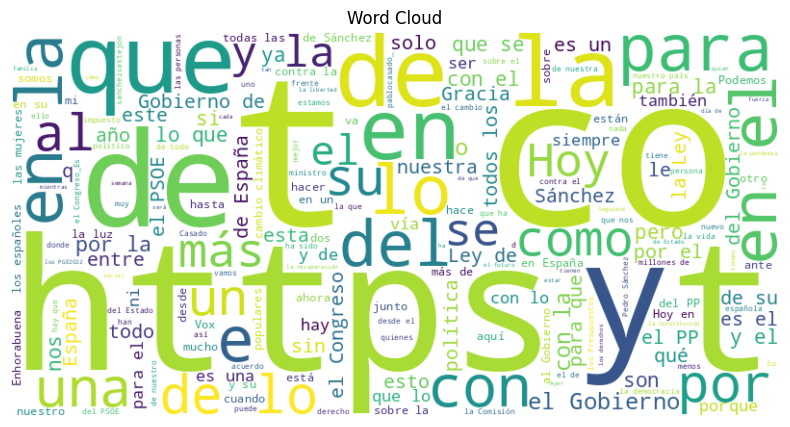

Tweets Containing Filler Words:
Tweet ID: 1448983098813734916
Tweet Text: Fortalecer el diálogo es fundamental para impulsar una Europa ambiciosa, que expande derechos y mira al futuro.   La iniciativa conjunta con Bélgica para corregir desigualdades sociales a través de indicadores ha tenido una muy buena acogida en este #EPSCO de Luxemburgo. https://t.co/cmcJeM9qF6
Filler Words: mira

Tweet ID: 1437813354261790726
Tweet Text: El gobierno de España defiende los hogares de 45 Millones de personas y las empresas eléctricas se rebelan. ¿Les parece sensato? Pues bien si los consumidores nos organizamos ENDESA, IBERDROLA y NATURGY entenderían que ellos dependen de nosotros los consumidores.
Filler Words: pues

Tweet ID: 1460521741617352704
Tweet Text: La Agenda 2030 de Sánchez para 🇪🇸 es que tú lleves en bici a tus hijos al colegio y él vaya a los actos del @PSOE en un avión pagado con el sudor de tu frente https://t.co/swQ6vchU4P
Filler Words: vaya

Tweet ID: 1451293560297381890
Tweet Tex

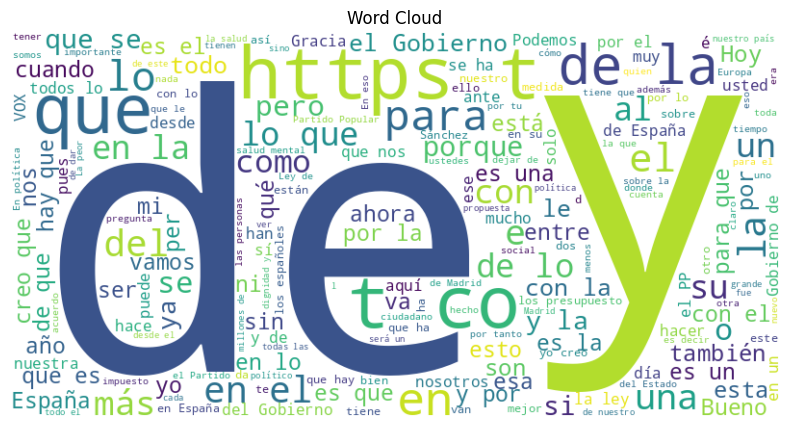

Tweets Containing Filler Words:
Tweet ID: 66807
Tweet Text: Y evidentemente creo que con eso no se puede jugar y no creo que vaya a ocurrir.
Filler Words: vaya

Tweet ID: 1577571541004451842
Tweet Text: Ciudadanos sigue atacando la subida de las pensiones. ¿Saben que la pensión más habitual no llega a los 1.100€? ¿Conocen a alguien que la cobre? Las pensiones van a subir no solo por respeto a nuestros mayores y a la Constitución, también porque es bueno para la economía.
Filler Words: bueno

Tweet ID: 114970
Tweet Text: Deduzco es una simple inferencia que estará incómodo entonces con ese compañero de viaje que es Podemos que está instalado en el Consejo de Ministros y que defiende, pues, una aversión permanente contra el régimen del 78 y una filosofía republicana y plurinacional.
Filler Words: entonces

Tweet ID: 73941
Tweet Text: Y entonces como usted decía, en este momento hemos decidido la semana pasada en Luxemburgo.
Filler Words: entonces

Tweet ID: 61206
Tweet Text: Bueno ahí yo

In [202]:
import csv

def preprocess_dev_data(df):
    data_exploration(df)
    preprocessing(df)
    add_additional_features(df)
    return df

def save_processed_dev_data(df, filepath):
    df.to_csv(filepath, sep='\t', index=False, quoting=csv.QUOTE_NONE)

#'CT24_checkworthy_arabic/CT24_checkworthy_arabic_dev.tsv'
dev = preprocess_dev_data(dev_df)
#'CT24_checkworthy_arabic/CT24_checkworthy_arabic_dev-test.tsv'
dev_test = preprocess_dev_data(dev_test_df)

save_processed_dev_data(dev, 'processed_spanish_dev.tsv')
save_processed_dev_data(dev_test, 'processed_spanish_dev_test.tsv')
save_processed_dev_data(train_df, 'processed_spanish_train.tsv')


In [204]:
dev.head()

,tweet_id,tweet_text,class_label,text_length,hashtags,mentions,text_length_category,class_label_encoded,hashtags_frequency,hashtags_sentiment,hashtags_topics
0,1468170499406639107,1995 Bajo el orden de Israel 80% la población Belén era cristiana. Desde está bajo control Autoridad Palestina. Y en 2021 apenas alcanzan 10%.,Yes,32,[],[],31-40,1,0,0.0,0
1,1456714073710768129,El @<USER> ha estado trabajando desde el comienzo de la Legislatura con las #víctimasdelamianto Habrá apoyo para los afectados en #PGE2022 Los y socialistas seguimos constancia discreción una premisa: respeto a víctimas sin juegos trileros.,No,45,"[#víctimasdelamianto, #PGE2022]",[@psoe],41-50,0,2,0.0,3
2,1448983098813734916,Fortalecer el diálogo es fundamental para impulsar una Europa ambiciosa que expande derechos y mira al futuro. La iniciativa conjunta con Bélgica corregir desigualdades sociales a través de indicadores ha tenido muy buena acogida en este #EPSCO Luxemburgo.,No,42,[#EPSCO],[],41-50,0,1,0.0,4
3,1465828278900563969,1 de diciembre y un objetivo compartido: Poner fin a la desigualdad. al sida. las pandemias #DiaMundialdelSIDA,No,23,[#DiaMundialdelSIDA],[],21-30,0,1,0.0,0
4,1436412790751830018,Por ellos: Francisco José Alcaraz convoca una manifestación en Mondragón el sábado 18-S,No,14,[],[],11-20,0,0,0.0,0
